# community ID with networkx

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Load Zachary's Karate Club graph
G = nx.karate_club_graph()
print(f"Nodes: {G.number_of_nodes()}")
print(f"Edges: {G.number_of_edges()}")
print(f"Average degree: {2 * G.number_of_edges() / G.number_of_nodes():.2f}")

Nodes: 34
Edges: 78
Average degree: 4.59


This gives you a moderately sized network with 34 nodes representing club members and 78 edges representing friendships. 
The average degree of 4.59 indicates that each member is connected to roughly 4–5 other members on average, 
suggesting a reasonably well-connected social network where most people know several others in the group.

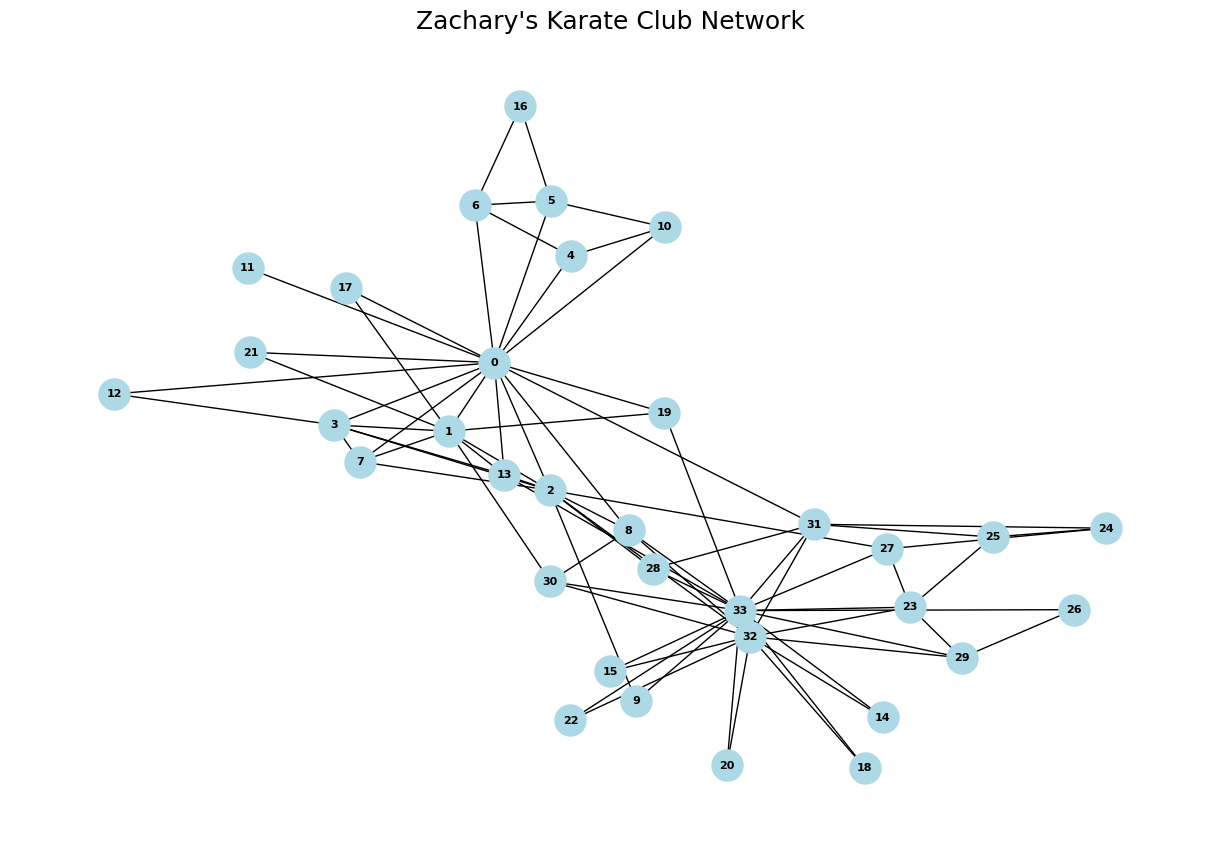

In [3]:
# baseline viz
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_color='lightblue', 
        node_size=500, font_size=8, font_weight='bold')
plt.title("Zachary's Karate Club Network", fontsize=18)
plt.show()

The spring layout algorithm positions nodes so that connected nodes are drawn closer together 
while disconnected nodes are pushed apart. 
This often reveals natural clustering patterns even before applying formal community detection methods. 
You may notice that certain groups of nodes appear to cluster together, suggesting potential community boundaries.

In [5]:
# louvain community detection
from networkx.algorithms import community

# Apply Louvain community detection
communities = community.louvain_communities(G, seed=42)
print(f"Number of communities detected: {len(communities)}")

# Create a dictionary mapping nodes to community IDs
node_to_community = {}
for i, comm in enumerate(communities):
    for node in comm:
        node_to_community[node] = i

print("Community assignments:")
for i, comm in enumerate(communities):
    print(f"Community {i}: {sorted(list(comm))}")

Number of communities detected: 4
Community assignments:
Community 0: [1, 2, 3, 7, 12, 13]
Community 1: [0, 4, 5, 6, 10, 11, 16, 17, 19, 21]
Community 2: [24, 25, 28, 31]
Community 3: [8, 9, 14, 15, 18, 20, 22, 23, 26, 27, 29, 30, 32, 33]


The Louvain algorithm found that four communities provide the optimal modularity score for this network. Notice the variation in community sizes: Community 3 is the largest with 14 members, while Community 2 is the smallest with only 4 members. This size variation is typical in real networks, where natural communities often have different scales.

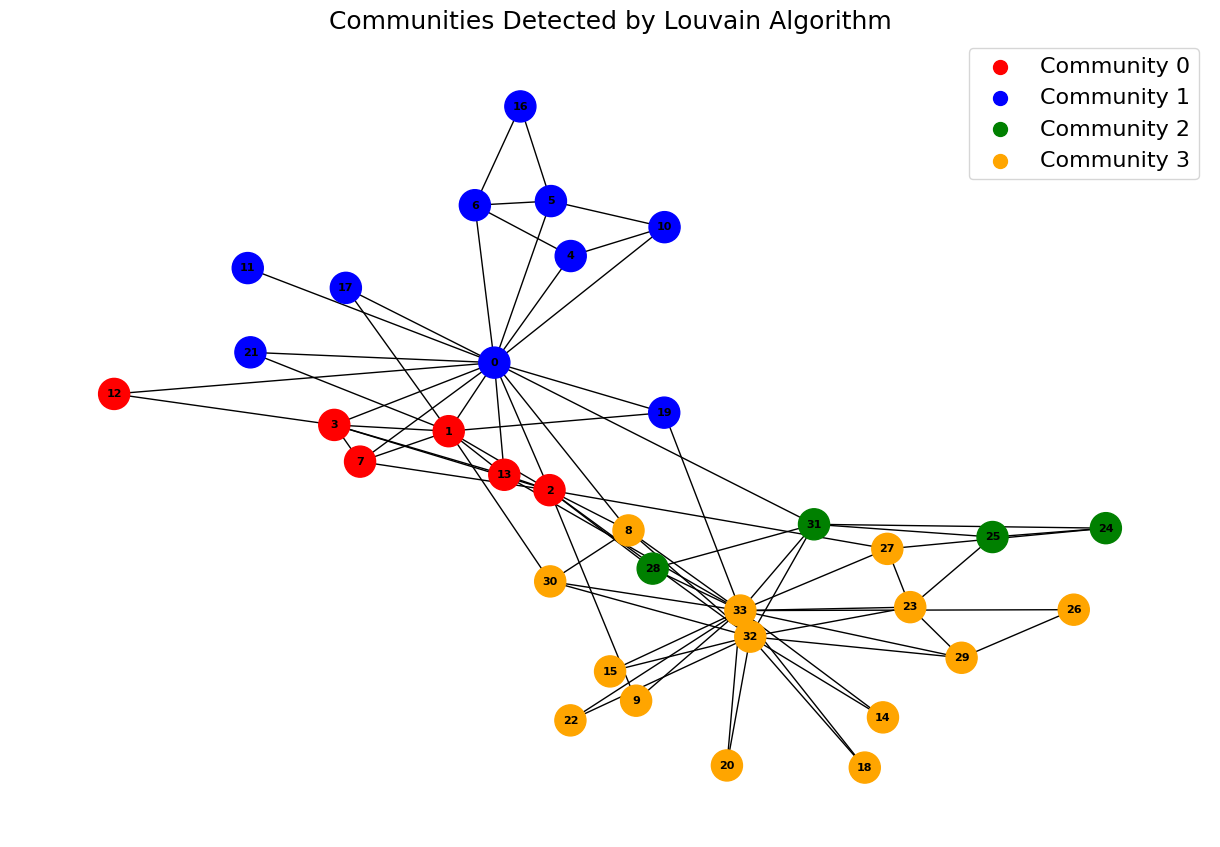

In [6]:
# viz with color coding
plt.figure(figsize=(12, 8))

# Create color map for communities
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray']
node_colors = [colors[node_to_community[node]] for node in G.nodes()]

# Draw the network with community colors
nx.draw(G, pos, with_labels=True, node_color=node_colors,
        node_size=500, font_size=8, font_weight='bold')

# Add legend
legend_elements = [plt.scatter([], [], c=colors[i], s=100, 
                              label=f'Community {i}') 
                  for i in range(len(communities))]
plt.legend(handles=legend_elements, loc='upper right', fontsize=16)
plt.title("Communities Detected by Louvain Algorithm", fontsize=18)
plt.show()

The Girvan–Newman algorithm uses a different approach, iteratively removing edges with the highest betweenness centrality to reveal community boundaries.

In [7]:
# Apply Girvan-Newman community detection
gn_communities = community.girvan_newman(G)

# Get the first partition (2 communities)
first_partition = next(gn_communities)
print(f"Girvan-Newman communities (2 groups):")
for i, comm in enumerate(first_partition):
    print(f"Community {i}: {sorted(list(comm))}")

# Calculate modularity for both methods
louvain_modularity = community.modularity(G, communities)
gn_modularity = community.modularity(G, first_partition)
print(f"\nModularity scores:")
print(f"Louvain: {louvain_modularity:.3f}")
print(f"Girvan-Newman: {gn_modularity:.3f}")

Girvan-Newman communities (2 groups):
Community 0: [0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21]
Community 1: [2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]

Modularity scores:
Louvain: 0.427
Girvan-Newman: 0.348


Girvan–Newman identifies a simpler two-community structure, which aligns with the known historical split in the actual karate club. However, the Louvain method achieves a higher modularity score (0.427 vs. 0.348), suggesting it finds a more statistically optimal partition. 

A higher modularity score indicates stronger community structure—groups are more tightly connected internally and better separated from each other. Both modularity scores are well above a common heuristic threshold of 0.3.

In [8]:
# community quality analysis
# Calculate community-specific metrics
print("Community Analysis:")
for i, comm in enumerate(communities):
    subgraph = G.subgraph(comm)
    internal_edges = subgraph.number_of_edges()
    external_edges = sum(1 for node in comm for neighbor in G.neighbors(node) 
                        if neighbor not in comm)
    
    print(f"\nCommunity {i}:")
    print(f"  Size: {len(comm)} nodes")
    print(f"  Internal edges: {internal_edges}")
    print(f"  External edges: {external_edges}")
    if internal_edges + external_edges > 0:
        ratio = internal_edges / (internal_edges + external_edges)
        print(f"  Internal/Total ratio: {ratio:.3f}")

Community Analysis:

Community 0:
  Size: 6 nodes
  Internal edges: 10
  External edges: 16
  Internal/Total ratio: 0.385

Community 1:
  Size: 10 nodes
  Internal edges: 14
  External edges: 12
  Internal/Total ratio: 0.538

Community 2:
  Size: 4 nodes
  Internal edges: 4
  External edges: 7
  Internal/Total ratio: 0.364

Community 3:
  Size: 14 nodes
  Internal edges: 26
  External edges: 13
  Internal/Total ratio: 0.667


- Community 3 shows the strongest internal cohesion with a 0.667 ratio, meaning about 67% of its edges stay within the community.
- Community 1 also shows good cohesion at 0.538.
- Communities 0 and 2 have lower ratios (0.385 and 0.364), indicating they have more external connections relative to their internal ones.

- The variation suggests some communities are more tightly knit than others, which is typical in real social networks where different groups may have varying levels of internal cohesion.

- The karate club dataset serves as a good example for community detection because it reflects an actual split that occurred in the club during the 1970s. The original study documented how the club split into two factions because of a dispute between the administrator (node 0) and instructor (node 33).

- Comparing algorithmic results to known ground truth helps validate the effectiveness of community detection methods. The Girvan–Newman two-community split closely matches this historical division, while the Louvain method reveals more granular substructure within these broader factions.
